# Girsanov theorem

https://en.wikipedia.org/wiki/Girsanov_theorem

[*********************100%***********************]  1 of 1 completed


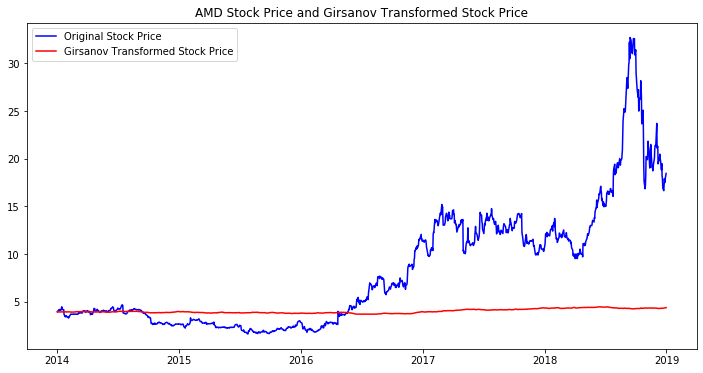

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def girsanov_theorem(returns):
    # Calculate the drift and volatility of the returns
    mu = returns.mean()
    sigma = returns.std()

    # Generate a Wiener process (standard Brownian motion)
    T = len(returns)
    dt = 1 / 252  # Assuming daily data, 252 trading days in a year
    dW = np.random.normal(0, np.sqrt(dt), T)
    W = np.cumsum(dW)

    # Use the Girsanov theorem to transform the Wiener process
    Z = np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * dW)
    S_tilde = np.cumprod(Z)

    return S_tilde

# Input
symbol = 'AMD'
start = '2014-01-01'
end = '2019-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Calculate the daily returns
dataset['Returns'] = dataset['Adj Close'].pct_change().dropna()

# Apply the Girsanov theorem to the returns
girsanov_transformed = girsanov_theorem(dataset['Returns'])

# Plot the original and transformed stock prices
plt.figure(figsize=(12, 6))
plt.plot(dataset.index, dataset['Adj Close'], label='Original Stock Price', color='blue')
plt.plot(dataset.index, dataset['Adj Close'][0] * girsanov_transformed, label='Girsanov Transformed Stock Price', color='red')
plt.title(f'{symbol} Stock Price and Girsanov Transformed Stock Price')
plt.legend()
plt.show()


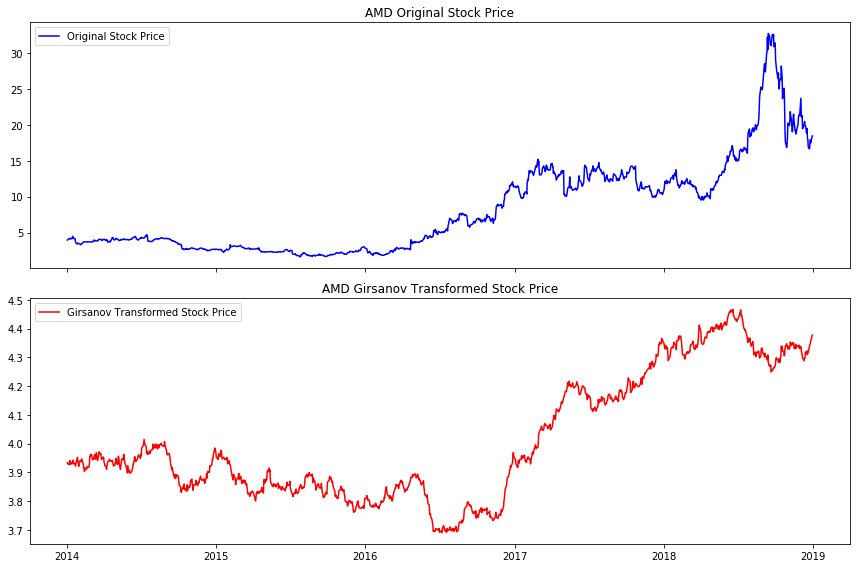

In [2]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the original stock price
ax1.plot(dataset.index, dataset['Adj Close'], label='Original Stock Price', color='blue')
ax1.set_title(f'{symbol} Original Stock Price')
ax1.legend()

# Plot the Girsanov transformed stock price
ax2.plot(dataset.index, dataset['Adj Close'][0] * girsanov_transformed, label='Girsanov Transformed Stock Price', color='red')
ax2.set_title(f'{symbol} Girsanov Transformed Stock Price')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()